<a href="https://colab.research.google.com/github/laxmanrajpoot/Test/blob/master/salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Latest_Data_Science_Salaries.csv")

In [ ]:
df.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
5,Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
6,Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
7,Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
8,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
9,Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


In [ ]:
y=df["Salary"]

In [ ]:
y.shape

(3300,)

In [ ]:
df.isnull().any()

Job Title             False
Employment Type       False
Experience Level      False
Expertise Level       False
Salary                False
Salary Currency       False
Company Location      False
Salary in USD         False
Employee Residence    False
Company Size          False
Year                  False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [ ]:
df.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [ ]:
x=df[["Job Title",'Employment Type','Experience Level','Company Location','Employee Residence','Company Size']]
x

,Job Title,Employment Type,Experience Level,Company Location,Employee Residence,Company Size
0,Data Engineer,Full-Time,Senior,United States,United States,Medium
1,Data Engineer,Full-Time,Senior,United States,United States,Medium
2,Data Engineer,Full-Time,Senior,United States,United States,Medium
3,Data Engineer,Full-Time,Senior,United States,United States,Medium
4,Data Scientist,Full-Time,Senior,United States,United States,Medium
...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,United States,United States,Large
3296,Principal Data Scientist,Full-Time,Mid,United States,United States,Large
3297,Data Scientist,Full-Time,Entry,United States,United States,Small
3298,Business Data Analyst,Contract,Entry,United States,United States,Large


In [ ]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 4.8 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(x, *['Experience Level'], **{})
chart

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

d = pd.DataFrame(enc.fit_transform(
    df[["Job Title",'Employment Type','Experience Level','Company Location','Employee Residence','Company Size']]).toarray())
d

,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
d.info()
d.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Columns: 276 entries, 0 to 275
dtypes: float64(276)
memory usage: 6.9 MB


<bound method NDFrame.describe of       0    1    2    3    4    5    6    7    8    9    ...  266  267  268  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3295  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3297  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      269  270  271  272  273

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.9384832529444156

In [ ]:
s=reg.predict(X_test)
s

array([200832., 168192., 128768., ..., 200832., 170176., 161856.])

In [84]:
from sklearn.metrics import r2_score
r2_score(y_train)


NameError: ignored

ValueError: ignored

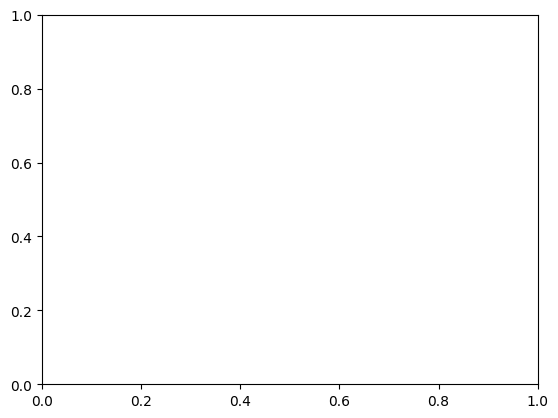

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, s, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
reg.coef_

array([ 9.61774270e+13,  9.61774271e+13,  9.61774272e+13,  9.61774270e+13,
        9.61774271e+13,  9.61774270e+13,  9.61774272e+13,  9.61774269e+13,
       -6.72067190e+17,  9.61774274e+13,  9.61774270e+13, -4.11461427e+18,
        9.61774270e+13,  9.61774270e+13,  9.61774267e+13,  9.61774269e+13,
        9.61774269e+13,  9.61774270e+13,  9.61774270e+13,  9.61774267e+13,
        9.61774270e+13,  9.61774269e+13,  9.61774269e+13,  9.61774270e+13,
        9.61774271e+13,  9.61774270e+13,  9.61774270e+13,  9.61774270e+13,
        9.61774270e+13,  9.61774270e+13,  9.61774270e+13,  9.61774269e+13,
        9.61774269e+13,  9.61774270e+13, -3.18129247e+18,  9.61774270e+13,
        9.61774269e+13,  9.61774270e+13, -2.62497364e+18,  9.61774270e+13,
        9.61774268e+13,  9.61774270e+13,  9.61774269e+13,  9.61774269e+13,
        6.43577643e+17,  9.61774269e+13,  9.61774269e+13,  9.61774270e+13,
        9.61774269e+13,  9.61774270e+13,  9.61774269e+13,  9.61774269e+13,
        9.61774269e+13,  

In [ ]:
reg.intercept_

-1.84310102150773e+17

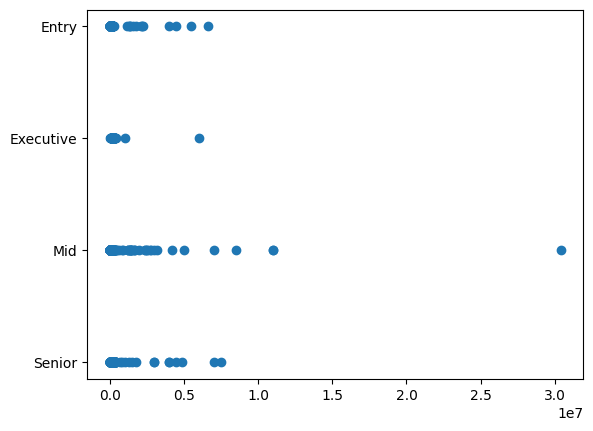

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y,df['Experience Level'])
plt.show()